In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lyricsgenius
import random
import json
import re

In [2]:
!pip install nltk

In [2]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wilsonlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Description of the code below
Importing data from Genius API, the objective is to  analyze the word frequencies in song lyrics. 
Leading and trailing whitespaces are eliminated from the lyrics to make them cleaner. In order to concentrate on more important terms, stop words—commonly used words with minimal semantic value—are eliminated.
The lyrics are then tokenized using the CountVectorizer method, which turns them into a matrix of word frequencies. 
Then bar charts for the top 15 words in each genre in order to visualize word frequency. 
These bar graphs offer a comparative examination of word usage trends across various musical genres.
The goal is to get a general understanding of word frequencies in song lyrics, giving insights into the predominate terms and topics within various musical genres. 

/Users/wilsonlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_59308/3200063970.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df.drop('Genre', axis=1, inplace=True)
/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_59308/3200063970.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df.drop('Genre

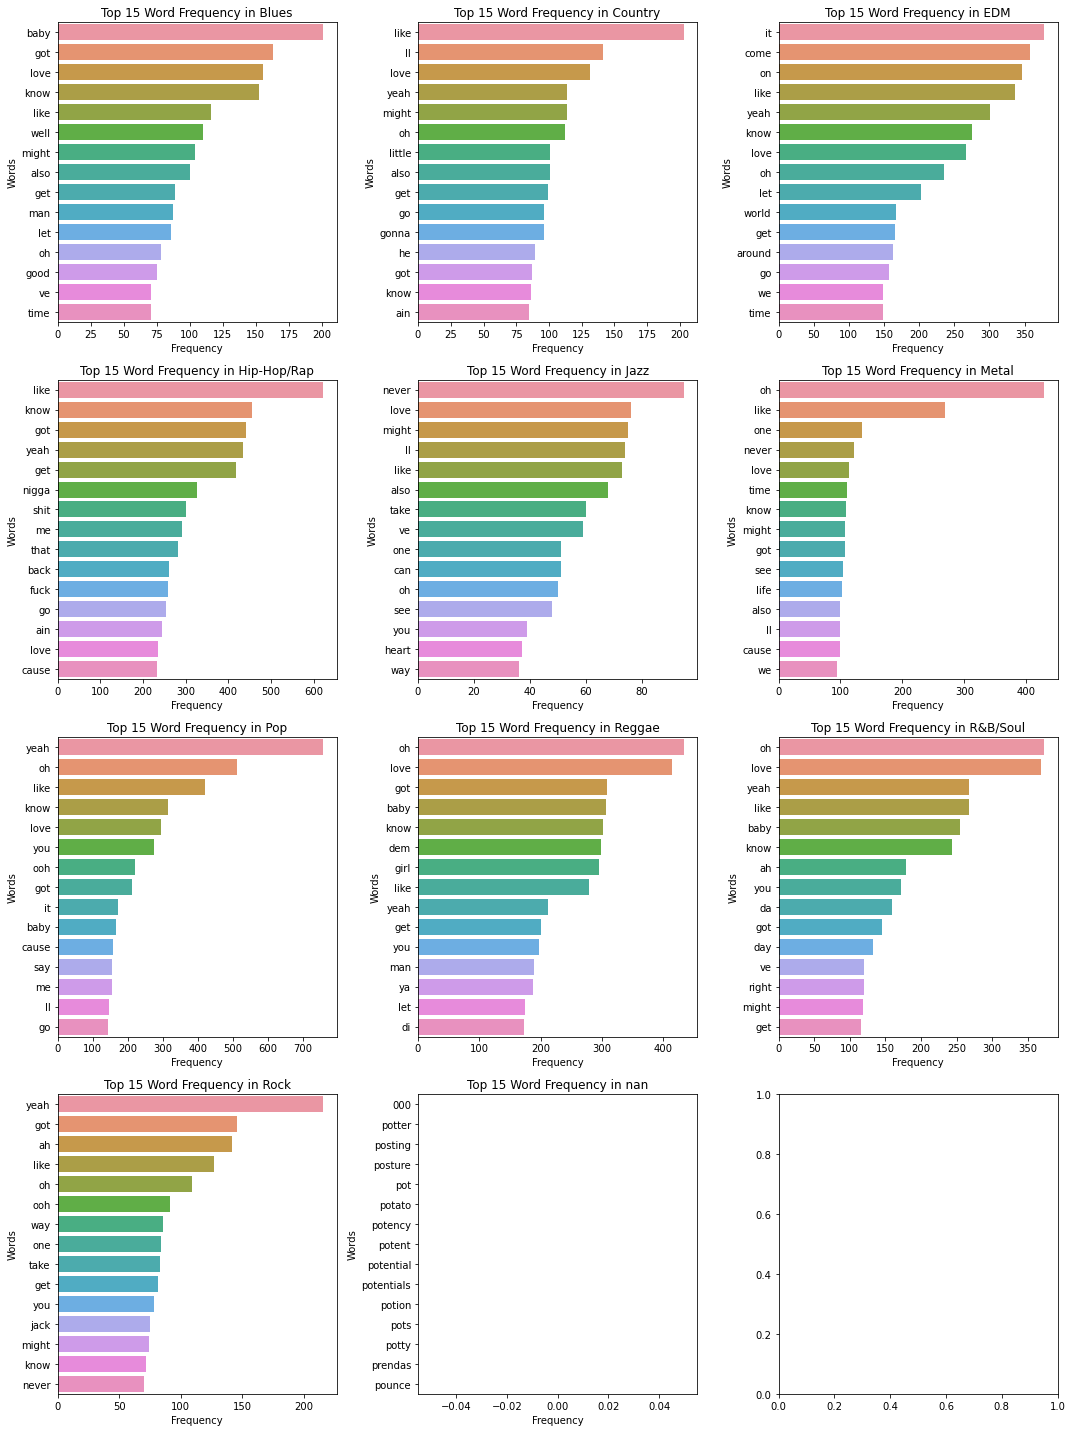

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Load the lyrics.csv file into a pandas DataFrame
data = pd.read_csv('lyrics.csv')

# Drop rows with missing values in the "Lyrics" column
data = data.dropna(subset=['Lyrics'])

# Remove leading/trailing whitespaces in the "Lyrics" column
data['Lyrics'] = data['Lyrics'].str.strip()

# Filter out empty lyrics
data = data[data['Lyrics'] != '']

# Define a function to remove stop words from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the "Lyrics" column
data['Lyrics'] = data['Lyrics'].apply(remove_stopwords)

# Create a count vectorizer to tokenize the lyrics
vectorizer = CountVectorizer()
lyrics_vectors = vectorizer.fit_transform(data['Lyrics'])

# Convert the lyrics vectors into a pandas DataFrame
lyrics_df = pd.DataFrame(lyrics_vectors.toarray(), columns=vectorizer.get_feature_names())

# Concatenate the lyrics DataFrame with the "Genre" column
data_with_lyrics = pd.concat([data['Genre'], lyrics_df], axis=1)

# Get unique genres
genres = data_with_lyrics['Genre'].unique()

# Set up the subplots
num_plots = len(genres)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create a big figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate over each unique genre and plot the bar chart of word frequencies
for i, genre in enumerate(genres):
    genre_df = data_with_lyrics[data_with_lyrics['Genre'] == genre]
    genre_df.drop('Genre', axis=1, inplace=True)
    genre_word_freq = genre_df.sum(axis=0)
    
    # Check if there are any remaining words
    if genre_word_freq.empty:
        print(f"No words remaining for {genre}")
        continue
    
    genre_word_freq = genre_word_freq.sort_values(ascending=False)
    top_words = genre_word_freq.head(15)
    
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.barplot(x=top_words.values, y=top_words.index, ax=ax)
    ax.set_title(f"Top 15 Word Frequency in {genre}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Words")

# Remove empty subplots
if len(genres) < num_plots:
    for i in range(len(genres), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Description of the code below
The code below try to achive the same goal of the previous code with the main difference that the code introduces a filtering mechanism to exclude common words and overall high-frequency words from the bar charts. 
This provides more focused and informative visualizations by highlighting unique and less frequent words specific to each genre

/Users/wilsonlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_59308/1796786727.py:43: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  overall_word_freq = df_with_lyrics.drop(columns=['Genre', 'Lyrics']).sum()


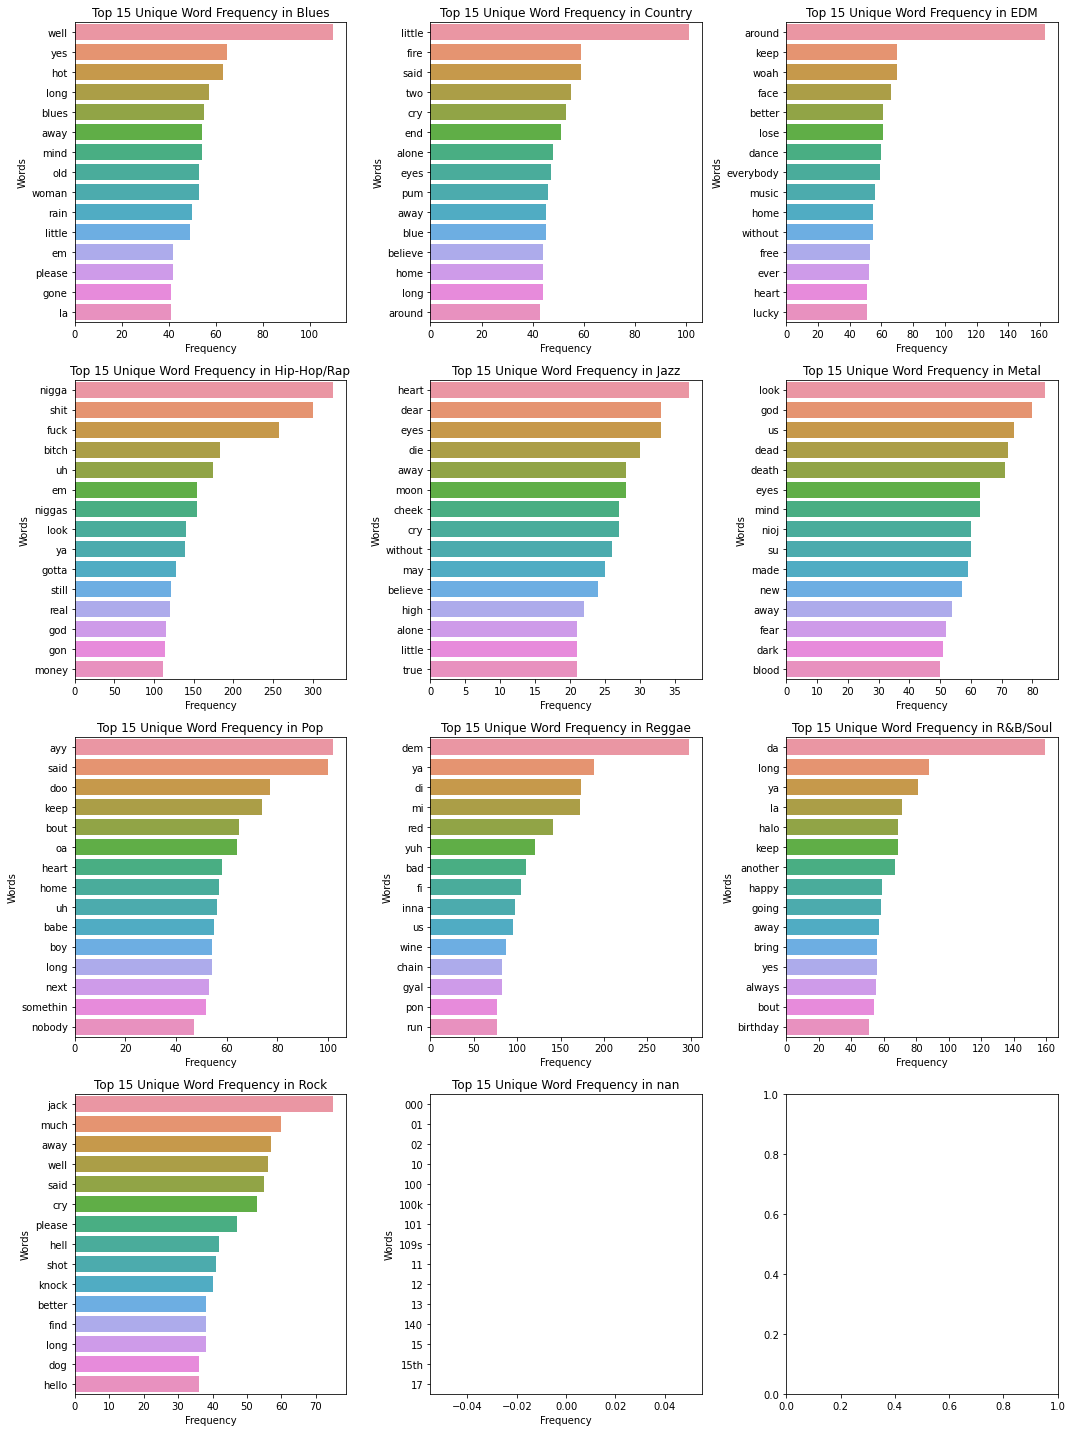

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Load the lyrics.csv file into a pandas DataFrame
df = pd.read_csv('lyrics.csv')

# Drop rows with missing values in the "Lyrics" column
df = df.dropna(subset=['Lyrics'])

# Remove leading/trailing whitespaces in the "Lyrics" column
df['Lyrics'] = df['Lyrics'].str.strip()

# Filter out empty lyrics
df = df[df['Lyrics'] != '']

# Define a function to remove stop words from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the "Lyrics" column
df['Lyrics'] = df['Lyrics'].apply(remove_stopwords)

# Create a count vectorizer to tokenize the lyrics
vectorizer = CountVectorizer()
lyrics_vectors = vectorizer.fit_transform(df['Lyrics'])

# Convert the lyrics vectors into a pandas DataFrame
lyrics_df = pd.DataFrame(lyrics_vectors.toarray(), columns=vectorizer.get_feature_names())

# Concatenate the lyrics DataFrame with the original DataFrame
df_with_lyrics = pd.concat([df, lyrics_df], axis=1)

# Define common words to be excluded
common_words = set(stopwords.words('english'))

# Calculate the overall word frequencies across all genres
overall_word_freq = df_with_lyrics.drop(columns=['Genre', 'Lyrics']).sum()

# Get unique genres
genres = df_with_lyrics['Genre'].unique()

# Set up the subplots
num_plots = len(genres)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Create a big figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate over each unique genre and plot the bar chart of top 15 unique word frequencies
for i, genre in enumerate(genres):
    genre_df = df_with_lyrics[df_with_lyrics['Genre'] == genre]
    
    # Exclude common words and overall high-frequency words
    genre_df = genre_df.select_dtypes(include='number').drop(columns=common_words, errors='ignore')
    
    # Exclude overall high-frequency words
    genre_word_freq = genre_df.sum()
    genre_word_freq = genre_word_freq[~genre_word_freq.index.isin(overall_word_freq[overall_word_freq > 500].index)]
    
    if genre_word_freq.empty:
        print(f"No unique words remaining for {genre}")
        continue
    
    top_words = genre_word_freq.nlargest(15)
    
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.barplot(x=top_words.values, y=top_words.index, ax=ax)
    ax.set_title(f"Top 15 Unique Word Frequency in {genre}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Words")

# Remove empty subplots
if len(genres) < num_plots:
    for i in range(len(genres), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



In [20]:
!pip install tabulate

In [5]:
from tabulate import tabulate

# Create an empty dataframe to store the top word frequencies for each genre
top_words_df = pd.DataFrame(columns=['Genre', 'Word', 'Frequency'])

# Iterate over each unique genre and collect the top 15 unique word frequencies
genres = df_with_lyrics['Genre'].unique()  # Get unique genres
for genre in genres:
    genre_df = df_with_lyrics[df_with_lyrics['Genre'] == genre]
    
    # Exclude common words and overall high-frequency words
    genre_df = genre_df.select_dtypes(include='number').drop(columns=common_words, errors='ignore')
    
    # Exclude overall high-frequency words
    genre_word_freq = genre_df.sum()
    genre_word_freq = genre_word_freq[~genre_word_freq.index.isin(overall_word_freq[overall_word_freq > 500].index)]
    
    if genre_word_freq.empty:
        print(f"No unique words remaining for {genre}")
        continue
    
    top_words = genre_word_freq.nlargest(15)
    
    # Add the top words to the dataframe
    top_words_df = top_words_df.append({'Genre': genre, 'Word': top_words.index, 'Frequency': top_words.values}, ignore_index=True)

# Display the table of top word frequencies for all genres
print(tabulate(top_words_df, headers='keys', tablefmt='psql'))


+----+-------------+---------------------------------------------------------------------------------+------------------------------------------------------------------------+
|    | Genre       | Word                                                                            | Frequency                                                              |
|----+-------------+---------------------------------------------------------------------------------+------------------------------------------------------------------------|
|  0 | Blues       | Index(['well', 'yes', 'hot', 'long', 'blues', 'away', 'mind', 'old', 'woman',   | [110.  65.  63.  57.  55.  54.  54.  53.  53.  50.  49.  42.  42.  41. |
|    |             |        'rain', 'little', 'em', 'please', 'gone', 'la'],                         |   41.]                                                                 |
|    |             |       dtype='object')                                                           |                  

/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_59308/2611709515.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_words_df = top_words_df.append({'Genre': genre, 'Word': top_words.index, 'Frequency': top_words.values}, ignore_index=True)
/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_59308/2611709515.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_words_df = top_words_df.append({'Genre': genre, 'Word': top_words.index, 'Frequency': top_words.values}, ignore_index=True)
/var/folders/6c/sxmv2g1j61316tx3f80_kj3m0000gn/T/ipykernel_59308/2611709515.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_words_df = top_words_df.append({'Genre': genre, 'Word': top_words.index, 'Frequency': 

In [6]:
import pandas as pd

# Create an empty dataframe to store the top word frequencies for each genre
top_words_df = pd.DataFrame(index=range(1, 16))

# Iterate over each unique genre and collect the top 15 unique word frequencies
genres = df_with_lyrics['Genre'].unique()  # Get unique genres
for genre in genres:
    genre_df = df_with_lyrics[df_with_lyrics['Genre'] == genre]
    
    # Exclude common words and overall high-frequency words
    genre_df = genre_df.select_dtypes(include='number').drop(columns=common_words, errors='ignore')
    
    # Exclude overall high-frequency words
    genre_word_freq = genre_df.sum()
    genre_word_freq = genre_word_freq[~genre_word_freq.index.isin(overall_word_freq[overall_word_freq > 500].index)]
    
    if genre_word_freq.empty:
        print(f"No unique words remaining for {genre}")
        continue
    
    top_words = genre_word_freq.nlargest(15).astype(int)  # Convert to integer
    
    # Add the genre's top words and frequencies to the main dataframe as columns
    top_words_df[f"{genre}"] = top_words.index
    top_words_df[f"{genre}_n"] = top_words.values

# Set the display options to show lines and adjust width
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

# Display the table of top word frequencies for all genres
top_words_df


,Blues,Blues_n,Country,Country_n,EDM,EDM_n,Hip-Hop/Rap,Hip-Hop/Rap_n,Jazz,Jazz_n,Metal,Metal_n,Pop,Pop_n,Reggae,Reggae_n,R&B/Soul,R&B/Soul_n,Rock,Rock_n,nan,nan_n
1,well,110,little,101,around,163,nigga,326,heart,37,look,84,ayy,102,dem,298,da,159,jack,75,000,0
2,yes,65,fire,59,keep,70,shit,300,dear,33,god,80,said,100,ya,188,long,88,much,60,01,0
3,hot,63,said,59,woah,70,fuck,258,eyes,33,us,74,doo,77,di,173,ya,81,away,57,02,0
4,long,57,two,55,face,66,bitch,183,die,30,dead,72,keep,74,mi,172,la,71,well,56,10,0
5,blues,55,cry,53,better,61,uh,174,away,28,death,71,bout,65,red,141,halo,69,said,55,100,0
6,away,54,end,51,lose,61,em,154,moon,28,eyes,63,oa,64,yuh,120,keep,69,cry,53,100k,0
7,mind,54,alone,48,dance,60,niggas,154,cheek,27,mind,63,heart,58,bad,110,another,67,please,47,101,0
8,old,53,eyes,47,everybody,59,look,141,cry,27,nioj,60,home,57,fi,104,happy,59,hell,42,109s,0
9,woman,53,pum,46,music,56,ya,139,without,26,su,60,uh,56,inna,97,going,58,shot,41,11,0
10,rain,50,away,45,home,55,gotta,128,may,25,made,59,babe,55,us,95,away,57,knock,40,12,0


/Users/wilsonlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


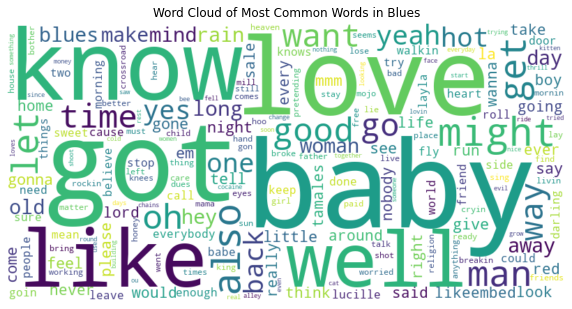

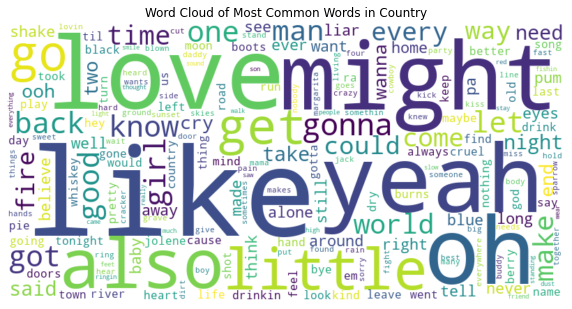

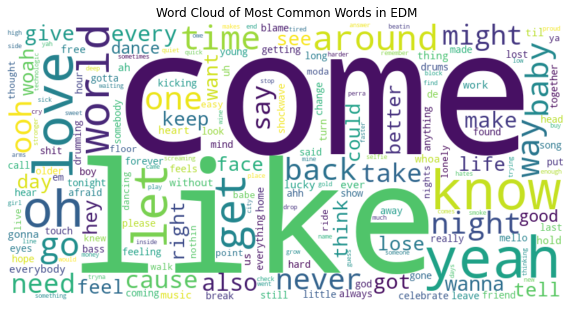

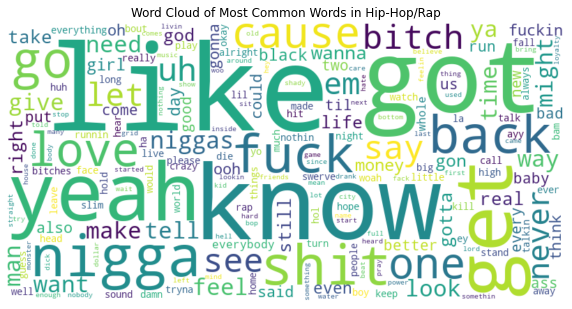

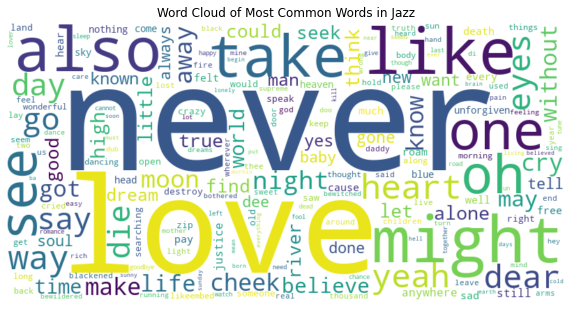

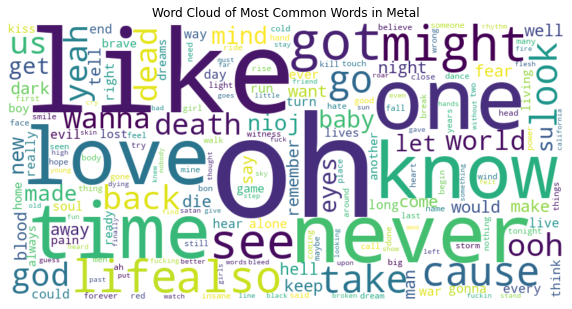

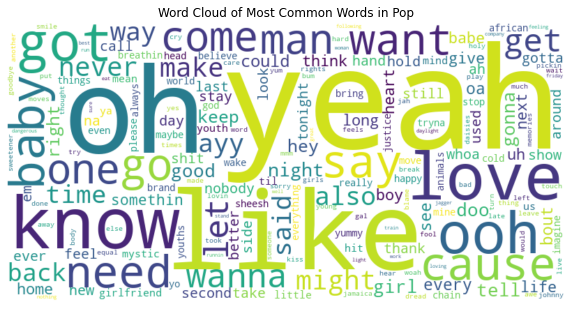

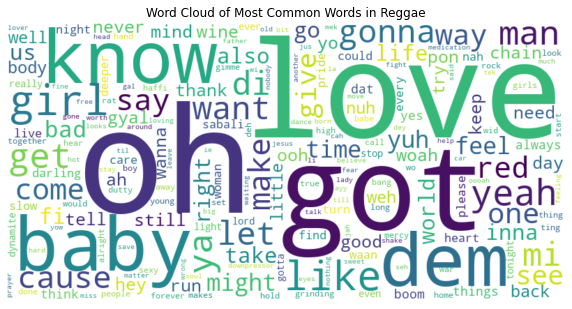

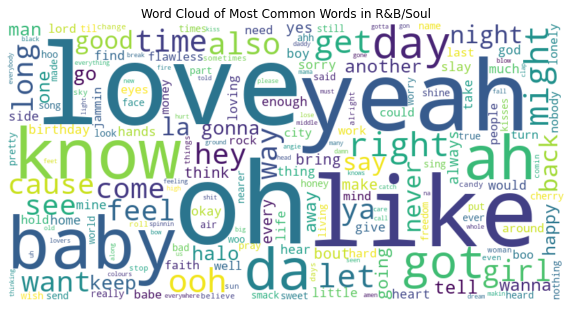

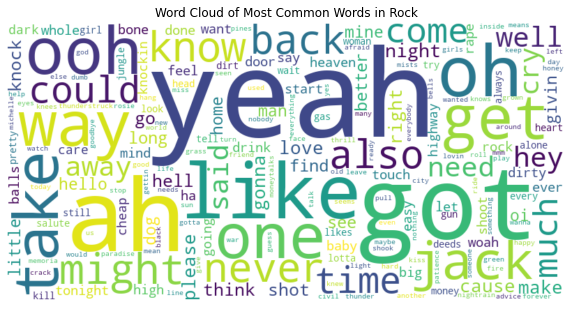

ZeroDivisionError: float division by zero

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Load the lyrics.csv file into a pandas DataFrame
df = pd.read_csv('lyrics.csv')

# Drop rows with missing values in the "Lyrics" column
df = df.dropna(subset=['Lyrics'])

# Remove leading/trailing whitespaces in the "Lyrics" column
df['Lyrics'] = df['Lyrics'].str.strip()

# Filter out empty lyrics
df = df[df['Lyrics'] != '']

# Define a function to remove stop words from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the "Lyrics" column
df['Lyrics'] = df['Lyrics'].apply(remove_stopwords)

# Create a count vectorizer to tokenize the lyrics
vectorizer = CountVectorizer()
lyrics_vectors = vectorizer.fit_transform(df['Lyrics'])

# Convert the lyrics vectors into a pandas DataFrame
lyrics_df = pd.DataFrame(lyrics_vectors.toarray(), columns=vectorizer.get_feature_names())

# Concatenate the lyrics DataFrame with the original DataFrame
df_with_lyrics = pd.concat([df, lyrics_df], axis=1)

# Define common words to be excluded
common_words = set(stopwords.words('english'))

# Get unique genres
genres = df_with_lyrics['Genre'].unique()

# Iterate over each unique genre and create a word cloud of the most common words
for genre in genres:
    genre_df = df_with_lyrics[df_with_lyrics['Genre'] == genre]
    
    # Exclude common words
    genre_df = genre_df.select_dtypes(include='number').drop(columns=common_words, errors='ignore')
    
    # Calculate the overall word frequencies for the genre
    genre_word_freq = genre_df.sum()
    
    if genre_word_freq.empty:
        print(f"No words remaining for {genre}")
        continue
    
    # Create a word cloud with the most common words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud of Most Common Words in {genre}")
    plt.axis('off')
    plt.show()
